In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/application_data.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# ***find categorical and numeric***

In [5]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column has a data type of 'object' (common for categorical data)
        categorical_columns.append(column)
num_categorical_columns = len(categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:", categorical_columns)

Number of categorical columns: 16
Categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [6]:
numerical_columns = []
for column in df.columns:
    if  df[column].dtype == 'int64' or df[column].dtype == 'float64':  # Check if the column has a data type of 'object' (common for categorical data)
        numerical_columns.append(column)
num_numerical_columns = len(numerical_columns)

print("Number of categorical columns:", num_numerical_columns)
print("Categorical columns:", numerical_columns)

Number of categorical columns: 106
Categorical columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'B

# ***2) Find Count of instances in 0 and 1 class***

In [7]:
value_counts = df['TARGET'].value_counts()
count_0 = value_counts.get(0, 0)
count_1 = value_counts.get(1, 0)
#print the  number
print('Total count of 0 in column TARGET: ' ,count_0)
print('Total count of 1 in column TARGET: ' ,count_1)

Total count of 0 in column TARGET:  282686
Total count of 1 in column TARGET:  24825


# *** find %***

In [8]:
# Calculate the percentage
total_instances = count_0 + count_1
percentage_0 = (count_0 / total_instances) * 100
percentage_1 = (count_1 / total_instances) * 100
# Print the percentage
print(f"Percentage of instances in class 0: {percentage_0:.2f}%")
print(f"Percentage of instances in class 1: {percentage_1:.2f}%")

Percentage of instances in class 0: 91.93%
Percentage of instances in class 1: 8.07%


# ***Bar chart for both 2nd and 3rd***

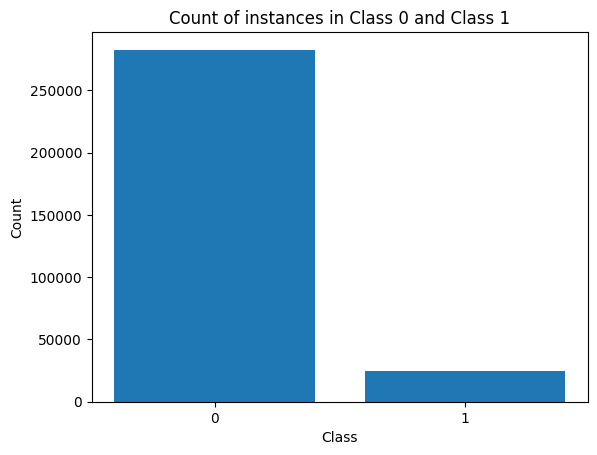

In [9]:
labels = ['0', '1']
counts = [count_0, count_1]

plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of instances in Class 0 and Class 1')

plt.show()

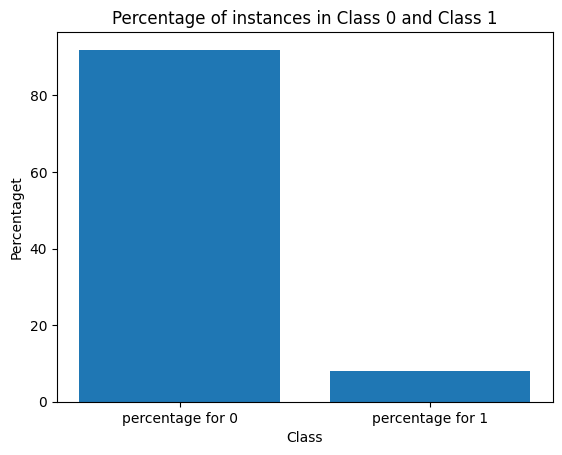

In [10]:
labels = ['percentage for 0', 'percentage for 1']
Percentage = [percentage_0, percentage_1]

plt.bar(labels, Percentage)
plt.xlabel('Class')
plt.ylabel('Percentaget')
plt.title('Percentage of instances in Class 0 and Class 1')

plt.show()

# ***5)Find unique values in each column***

In [11]:
column_names=list(df.columns)
for k in column_names:
  print(k, df[k].unique().shape[0])

SK_ID_CURR 307511
TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13673
AMT_GOODS_PRICE 1003
NAME_TYPE_SUITE 8
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 63
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 19
CNT_FAM_MEMBERS 18
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 114585
EXT_SOURCE_2 119832
EXT_SOURCE_3 815
APARTMENTS_AVG 2340
BASEMENTAREA_AVG 3781
YEARS_BEGINEXPLUATATION_AVG 286
YEARS_BUILD_AVG 150
COMMONARE

# ***6) Find how many nan values in each column***

In [12]:
df_missing_value_percentage = 100*df.isnull().sum()/len(df)
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0039022994299390914
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 65.9908100848425
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 0.0
OCCUPATION_TYPE 31.345545362604916
CNT_FAM_MEMBERS 0.000650383238323182
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_1 56.3810725

# ***7) Preprocessing for each column differently according to the nan values in each column ***

In [13]:
#removing columns whose percentage of null values is less than 50%
columns_with_nan = df.columns[df.isnull().any()]
for column in columns_with_nan:
    if df[column].isnull().sum() / len(df) > 0.5:
      df = df.drop(column, axis=1)

In [14]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_missing_value_percentage = 100*df.isnull().sum()/len(df)
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0039022994299390914
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 0.0
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 31.345545362604916
OCCUPATION_TYPE 0.000650383238323182
CNT_FAM_MEMBERS 0.0
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.21462646864665003
EXT_SOURCE_1 19.8253

In [16]:
#drop columns that are not useful for the module and have more than 40% missing values
df = df.drop(['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI'], axis=1)

In [17]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_missing_value_percentage = 100*df.isnull().sum()/len(df)
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0039022994299390914
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 0.0
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 31.345545362604916
OCCUPATION_TYPE 0.000650383238323182
CNT_FAM_MEMBERS 0.0
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.21462646864665003
EXT_SOURCE_1 19.8253

9) Analysis of OCCUPATION_TYPE do a plot showing count of each category

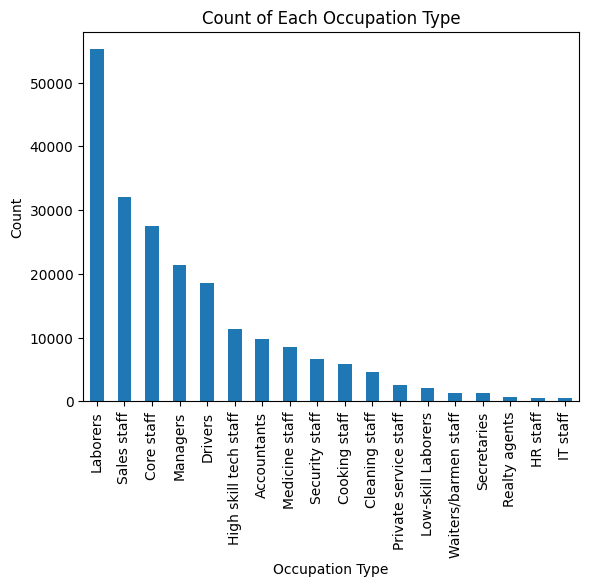

In [19]:
occupation_counts = df['OCCUPATION_TYPE'].value_counts()

# Create a bar plot showing the count of each category
occupation_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Count of Each Occupation Type')

# Display the plot
plt.show()

# ***11) How many TARGET COLUMNS are 1 and 0 for most reoccurring category in OCCUPATION_TYPE   column ***

In [20]:
# Determine the most recurring category in the "OCCUPATION_TYPE" column
most_common_occupation = df['OCCUPATION_TYPE'].value_counts().idxmax()
print(most_common_occupation)
# Filter the DataFrame to include only rows with the most recurring category
filtered_df = df[df['OCCUPATION_TYPE'] == most_common_occupation]
#print(filtered_df)
# Count the occurrences of target values (1 and 0) in the filtered DataFrame
target_counts = filtered_df['TARGET'].value_counts()

# Retrieve the count for target values 1 and 0
target_1_count = target_counts.get(1, 0)
target_0_count = target_counts.get(0, 0)
print("Count of Target 1:", target_1_count)
print("Count of Target 0:", target_0_count)

Laborers
Count of Target 1: 5838
Count of Target 0: 49348


# ***12) How many TARGET COLUMNS are 1 and have OCCUPATION_TYPE  column  as labourer***

In [21]:
percentage = (target_1_count/count_1)*100
percentage

23.516616314199396

# ***pie chart for counts of NAME_CONTRACT_TYPE and NAME_INCOME_TYPE***

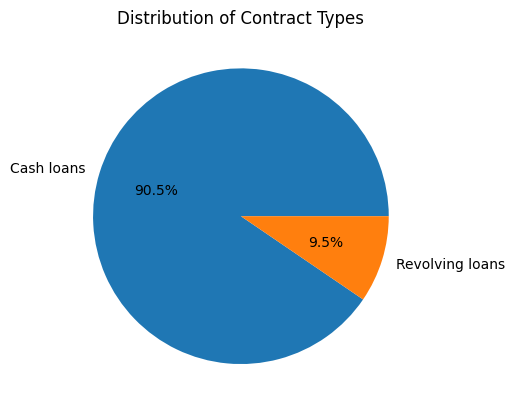

In [22]:

NAME_CONTRAC_counts = df['NAME_CONTRACT_TYPE'].value_counts()
plt.pie(NAME_CONTRAC_counts, labels=NAME_CONTRAC_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Contract Types')
#plt.legend()
plt.show()

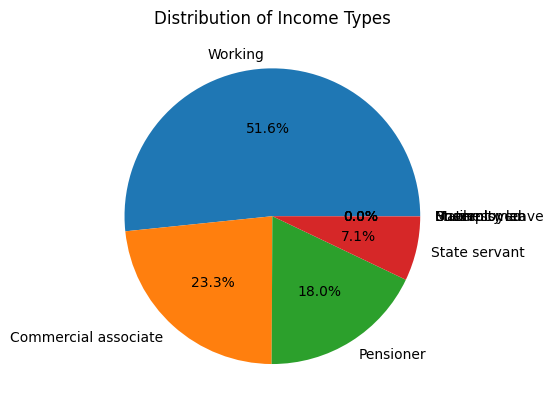

In [23]:
NAME_INCOME_counts = df['NAME_INCOME_TYPE'].value_counts()
plt.pie(NAME_INCOME_counts, labels=NAME_INCOME_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Income Types')

plt.show()

# ***Bar chart forand NAME_INCOME_TYPE***

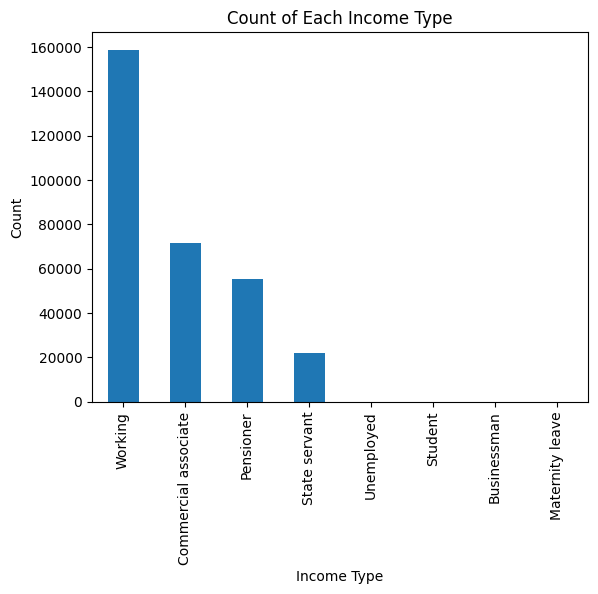

In [24]:
NAME_INCOME_counts = df['NAME_INCOME_TYPE'].value_counts()

# Create a bar plot showing the count of each category
NAME_INCOME_counts.plot(kind='bar')

# Customize the plot
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Count of Each Income Type')

# Display the plot
plt.show()

# ***Remove  occupation type column***

In [25]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#df=df.drop(['OCCUPATION_TYPE'],axis=1)
#df

In [27]:
# Drop rows with NaN values in the "occupation type" column
#df.dropna(subset=['OCCUPATION_TYPE'], inplace=True)

# Print the updated dataframe
#df.head()

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assume df is your dataframe and 'column_name' is the column you want to modify

df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
label_encoder = LabelEncoder()
df['OCCUPATION_TYPE'] = label_encoder.fit_transform(df['OCCUPATION_TYPE'])
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df['OCCUPATION_TYPE']

0          8
1          3
2          8
3          8
4          3
          ..
307506    14
307507    17
307508    10
307509     8
307510     8
Name: OCCUPATION_TYPE, Length: 307511, dtype: int64

# ***fill remaining nan values with mode or median and apply***

In [30]:
 columns_with_nan = df.columns[df.isnull().any()]

for column in columns_with_nan:

  if df[column].dtype == 'float64' or df[column].dtype == 'int64':

    df[column].fillna(df[column].median(), inplace=True)

  else:

    df[column].fillna(df[column].mode()[0], inplace=True)

df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
"""df_missing_value_percentage = 100*df.isnull().sum()/len(df)
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])"""

'df_missing_value_percentage = 100*df.isnull().sum()/len(df)\nfor k in range(df_missing_value_percentage.shape[0]):\n  print(column_names[k],df_missing_value_percentage.iloc[k])'

In [32]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column has a data type of 'object' (common for categorical data)
        categorical_columns.append(column)
num_categorical_columns = len(categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:", categorical_columns)

Number of categorical columns: 11
Categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


# ***Apply Random Forest, ANN,KNN,SVM and logistic regression and compare results using a bar chart for each model***

In [34]:
"""import pandas as pd

# Assume df is your dataframe with the columns to encode

# Get dummy variables for multiple columns

# Print the resulting dataframe
encoded_vars"""

'import pandas as pd\n\n# Assume df is your dataframe with the columns to encode\n\n# Get dummy variables for multiple columns\n\n# Print the resulting dataframe\nencoded_vars'

In [35]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X = df.iloc[:,3:].values #independent
y = df.iloc[:,1:2].values #dependent

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_random_Forest = accuracy_score(y_test, y_pred_rf)
print('accuracy_random_Forest : %.3f' %accuracy_random_Forest)

<ipython-input-38-f3194963b584>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


accuracy_random_Forest : 0.919


In [39]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_pred = logistic_regression.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred)
print(accuracy_logistic_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9195161211648212


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'n_neighbors' is the desired number of neighbors for the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
Accuracy_KNN = accuracy_score(y_test, y_pred_knn)
print('Accuracy_KNN : %.3f' %Accuracy_KNN)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_KNN : 0.913


In [42]:
# Assuming you have imported and preprocessed the necessary libraries for ANN (e.g., TensorFlow, Keras)
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import tensorflow as tf #used for deep learning
tf.__version__

ann = tf.keras.models.Sequential()
# Add desired layers to your ANN model using Dense layers

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the ANN model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Train the ANN model
ann.fit(X_train, y_train, epochs=3, batch_size=32)

# Predict the target variable for the test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions
accuracy_score_ANN = accuracy_score(y_test, y_pred)
print(accuracy_score_ANN)

Epoch 1/3
7688/7688 [==============================] - 16s 2ms/step - loss: 159.4638 - accuracy: 0.8499
Epoch 2/3
7688/7688 [==============================] - 15s 2ms/step - loss: 7.0606 - accuracy: 0.8698
Epoch 3/3
1922/1922 [==============================] - 2s 1ms/step
0.9194510836869746


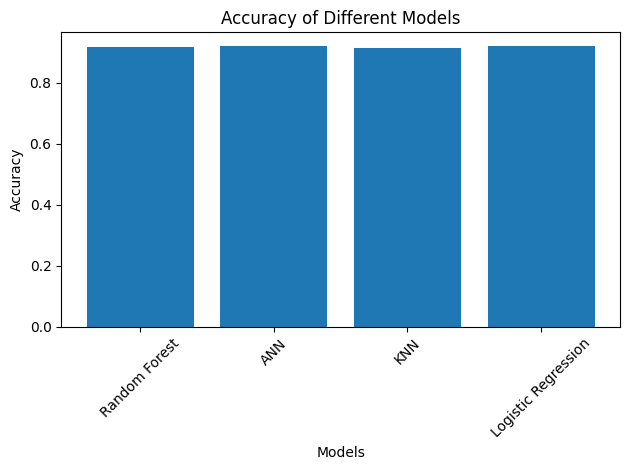

In [44]:
import numpy as np
import matplotlib.pyplot as plt
accuracy_scores = [accuracy_random_Forest, accuracy_score_ANN, Accuracy_KNN, accuracy_logistic_regression]
models = ['Random Forest', 'ANN', 'KNN', 'Logistic Regression']
x = np.arange(len(models))
plt.bar(x, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(x, models, rotation=45)
plt.tight_layout()
plt.show()